# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):  
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city.replace(' ','+')}"
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    #Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
        #print(f"{city}{len(city_data)}")

    except:
        print(f"City {city} not found. Skipping...")
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acapulco
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | jacksonville
Processing Record 4 of Set 1 | oksfjord
Processing Record 5 of Set 1 | buon me thuot
City buon me thuot not found. Skipping...
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | naze
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | aklavik
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | marrakesh
Processing Record 20 of Set 1 | rawannawi
City rawannawi not found. Skipping...
Processing Record 21 of Set 1 | okha
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,acapulco,16.8634,-99.8901,24.90,57,100,0.00,MX,1679410669
1,jamestown,42.0970,-79.2353,7.23,41,75,6.69,US,1679410068
2,jacksonville,30.3322,-81.6556,18.94,68,20,7.72,US,1679410655
3,oksfjord,70.2396,22.3479,-1.67,86,100,4.66,NO,1679410670
4,cherskiy,68.7500,161.3000,-26.11,99,100,3.37,RU,1679410671


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acapulco,16.8634,-99.8901,24.90,57,100,0.00,MX,1679410669
1,jamestown,42.0970,-79.2353,7.23,41,75,6.69,US,1679410068
2,jacksonville,30.3322,-81.6556,18.94,68,20,7.72,US,1679410655
3,oksfjord,70.2396,22.3479,-1.67,86,100,4.66,NO,1679410670
4,cherskiy,68.7500,161.3000,-26.11,99,100,3.37,RU,1679410671


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

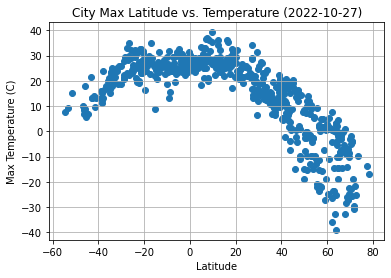

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Add Title, Labels, and Gridlines to plot
plt.title('City Max Latitude vs. Temperature (2022-10-27)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

plt.scatter(x_values, y_values)
plt.rcParams['figure.figsize'] = (6.4,4.8)

# Save the figure
plt.savefig('output_data/Fig11.jpg')

# Show plot
plt.show()

#### Latitude Vs. Humidity

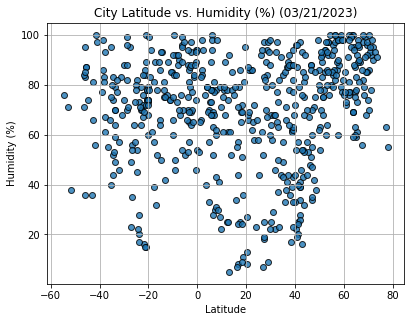

In [9]:
# Build the scatter plots for latitude vs. humidity
date = time.strftime("%m/%d/%Y")
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, alpha = 0.8, edgecolors = "k")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (%) ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LatitudeVsHumidtyPlot.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Add Title, Labels, and Gridlines to plot
plt.title("City Max Latitude vs. Cloudiness (2022-10-27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

plt.scatter(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig3.jpg")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

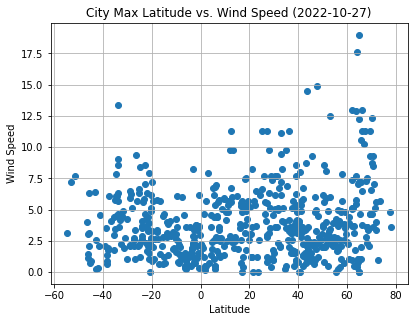

In [10]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Add Title, Labels, and Gridlines to plot
plt.title("City Max Latitude vs. Wind Speed (2022-10-27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.scatter(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig8.jpg")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Define a function to create Linear Regression plots

def Linear_Regression_Plots(x,y):
    slope, intercept, r, p, stderr = linregress(x,y)

    plt.plot(x, x * slope + intercept, color="r")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.legend([line_eq], labelcolor='r')

    # Print r value
    print(f"The r-value is: {r*r}")

In [12]:
# Define a function to create Linear Regression plots

def Linear_Regression_Plots(x,y):
    slope, intercept, r, p, stderr = linregress(x,y)

    plt.plot(x, x * slope + intercept, color="r")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.legend([line_eq], labelcolor='r')

    # Print r value
    print(f"The r-value is: {r*r}")

In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,mataura,-46.1927,168.8643,7.01,95,100,1.15,NZ,1679410672
9,hobart,-42.8794,147.3294,13.36,81,100,2.57,AU,1679410561
10,bengkulu,-3.8004,102.2655,25.53,88,99,1.45,ID,1679410674
13,bredasdorp,-34.5322,20.0403,23.39,52,20,7.82,ZA,1679410676
14,rikitea,-23.1203,-134.9692,26.14,79,48,5.86,PF,1679410676


In [20]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] > 0)]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acapulco,16.8634,-99.8901,24.90,57,100,0.00,MX,1679410669
1,jamestown,42.0970,-79.2353,7.23,41,75,6.69,US,1679410068
2,jacksonville,30.3322,-81.6556,18.94,68,20,7.72,US,1679410655
3,oksfjord,70.2396,22.3479,-1.67,86,100,4.66,NO,1679410670
4,cherskiy,68.7500,161.3000,-26.11,99,100,3.37,RU,1679410671


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7488998391402495


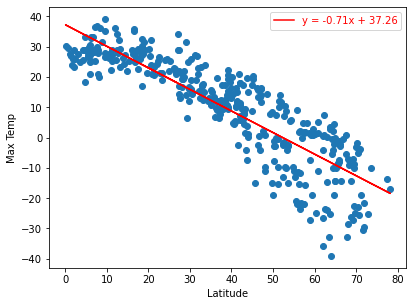

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values)

plt.show()

The r-value is: 0.3860289277444897


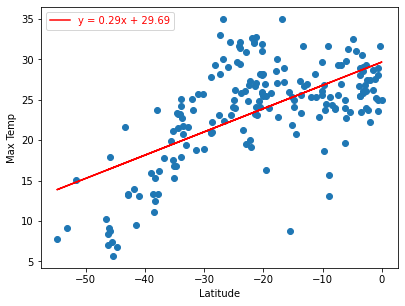

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1177585569317648


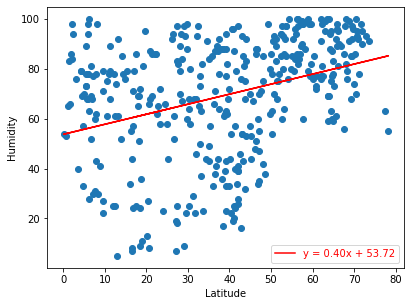

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values, y_values)

plt.show()

The r-value is: 0.020588591180006315


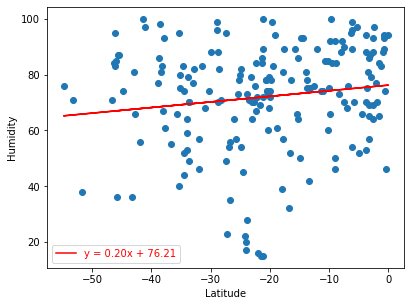

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values, y_values)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.052990210472467866


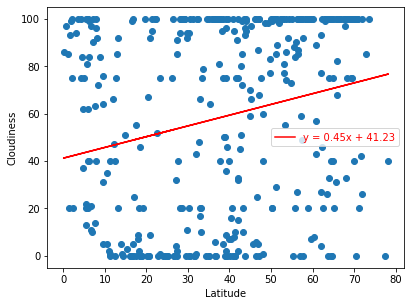

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values, y_values)

plt.show()

The r-value is: 0.04108690245183171


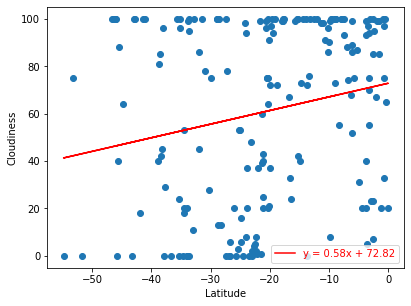

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values, y_values)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01767595146638733


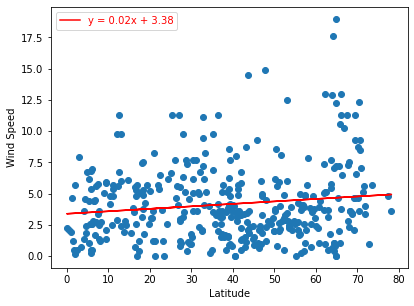

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values, y_values)

plt.show()

The r-value is: 0.06938738082045913


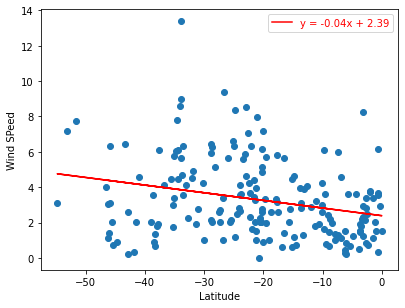

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Wind SPeed")

plt.scatter(x_values, y_values)

plt.show()